## Домашнее задание 1

**Разбаловка**: 

1) задачи 1 - 4: по 1 баллу
2) задачи 5 - 6: по 2 балла
3) задача 7: 4 балла

Максимальный балл: 12 баллов. Оценка за задание ставится как `min(10, ваш балл)`. 

### Пакет NumPy
---


In [ ]:
import numpy as np
import random
import scipy.stats as sps

# Задача 1
В первой задаче вам предлагается перемножить две матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [ ]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((100,1000))
b = np.random.sample((1000,100))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
# <YOUR CODE GOES HERE> 
# ========

In [ ]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy (с помощью тройного цикла) и верните результат 

In [ ]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием матричного умножения из пакета NumPy и верните результат

In [ ]:
# Превратим матрицы в листы, чтобы протестировать функцию без np
a_list = [[x for x in row] for row in a]
b_list = [[x for x in row] for row in b]

In [ ]:
%%time
# засечем время работы функции без NumPy
mult(a_list, b_list)

In [ ]:
%%time
# засечем время работы функции с NumPy
np_mult(a, b)

## Задача 2

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить (конкатенировать) массив X с преобразованным X и вывести в обратном порядке. 

In [ ]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    # Ваш код здесь
    return Y

In [ ]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    # Ваш код здесь
    return Y

In [ ]:
X = sps.uniform.rvs(size=10 ** 7)
X_list = list(X)
# здесь код эффективнее примерно в 10 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X_list)
# проверим корректность:
print(np.abs(S1 - S2).sum())

Почему методы ***numpy*** оказываются эффективнее?

In [ ]:
# Ваш ответ

## Задача 3

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

In [ ]:
grid_x, grid_y = # Ваш ответ

draw_f(grid_x, grid_y)

### Пакет Matplotlib
---


In [2]:
import scipy.stats as sps
import numpy as np

import matplotlib.pyplot as plt

## Задача 4

В этом задании вам показан график, который нужно получить (иллюстрирующий ЦПТ / бутстреп) и посчитаны все необходимые массивы. Вам нужно написать код, который отрисовывает максимально похожий график (revrese engineering решаем).

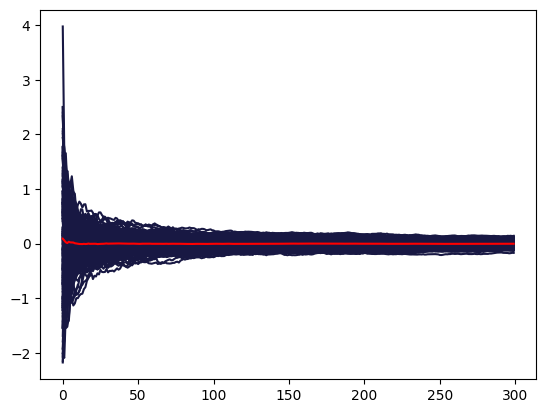

In [23]:
cnt_samples = 200
n = 300
theta = 0

samples = sps.norm.rvs(size=(cnt_samples, n))
thetas = np.cumsum(samples, axis=1) / np.arange(1, n + 1)

mean_theta = np.mean(thetas, axis=0)
stds = np.std(thetas, axis=0)

In [ ]:
raise ValueError("In case you deside do run all the cells before watching the example below")

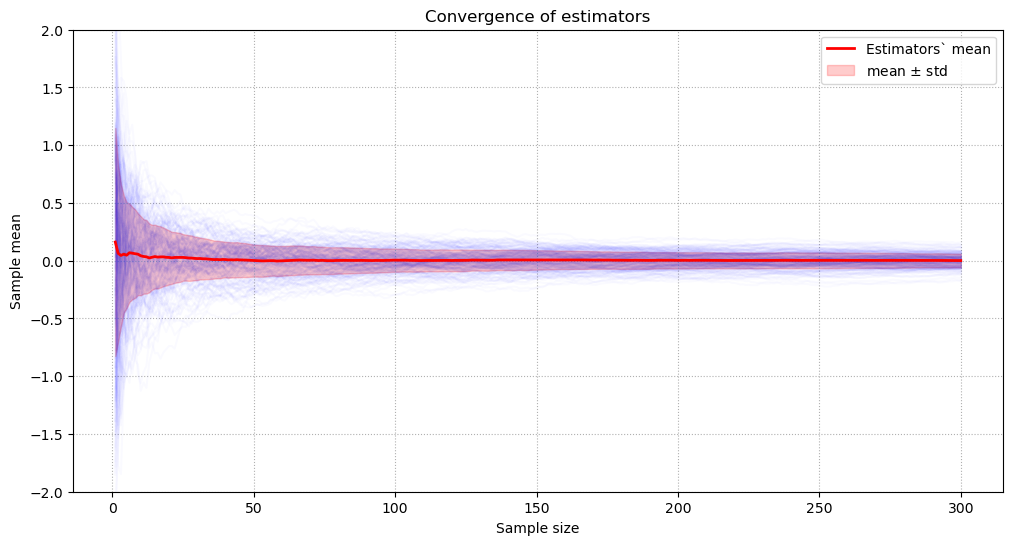

In [22]:
# EXAMPLE, do not run this cell

### Пакет pytorch
---


In [27]:
import torch

*Дисклеймер 1:* в последующих задачах необходимо будет рисовать графики. Графики должны быть понятными. Критерий понятности: на график можно посмотреть в отрыве от кода и полностью понять что на нем изображено. Используйте подписи к осям, легенду и т.д.

*Дисклеймер 2:* весь код на торче должен запускаться без изменений как на CPU, так и на GPU (если оно доступно). 


## Задача 5


Есть такой алгоритм машинного обучения, который называется "Метод опорных векторов" (SVM). 

В его сути много интересной теории связанной с линейной алгеброй, но сейчас нам это не так интересно. В этом задании необходимо "реализовать" оптимизацию Loss-а для SVM с помощью torch (аналогично ячейкам раздела Optimization с семинарского ноутбука).

Для этого потребуются следующие формулы: 

Предсказания $y\_pred = <x, w>$ и функция потерь на одном объекте $loss(y, y\_pred) = \max(1 - y \cdot y\_pred, 0)$

In [ ]:
def svm_loss(y_pred, y_true):
    # реализуйте функцию потерь SVM. Помните что на вход приходят тензоры ответов на всех объектах
    # а вернуть нужно одно число -- лосс для всей выборки
    return # YOUR CODE HERE

x = torch.randn(100, 10)  # выборка, здесь тоже необходимо что-то поменять чтобы удовлетворить дисклеймер 2
w = # вектор весов
y = # случайный массив из +1 или -1 который будет в роли таргетов

Сохраните как менялся лосс при использовании 2-3 различных оптимизаторов, постройте соответствующие графики (с помощью matplotlib), выберите лучший для конкретно этой задачи.

In [ ]:
n_epochs = 10

for epoch in range(n_epochs):
    ### zero grad
    
    ### forward + backward

    ### optimizer step
    
    ### logging
    pass

**Вопрос:** для чего нужен метод тензоров `.item()`?

**Ответ:**

### Задача 6

Нужно сделать все тоже самое, что и в задании 5, только теперь сравниваем не оптимизатор, а архитектуры нейросетей.
Для сравнения зафиксируем оптимизатор Адам с параметром $lr=0.001$

Реализуйте 2 нейронных сети следующими архитектурами:

1) Последовательная сеть: x -> линейный слой в размерность 16, leaky_relu -> линейный слой в размерность 32, leaky_relu -> линейный слой в размерность 1
2)  Нелинейная сеть
    1) x -> линейный слой в 16, leaky_relu = x1
    2) x -> линейный слой в 8, tanh = x2
    3) x -> линейный слой в 8, elu = x3

        конкатенация [x1, x2, x3] -> линейный слой в 8, leaky_relu -> линейный слой в 1

Изобразите на графиках как изменяется лосс для двух архитектур нейросетей. Используйте одинаковое коилчество эпох.

### Задача 7

In [ ]:
# download data
!wget "https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1" -O ./quora.txt

В текстовом файле `quora.txt` содержатся вопросы с сайта quora. В этом задании мы будем решать искуственнную задачу классификации: label = 1 если длина вопроса (в символах) *строго больше* 30. 

Для этого нам потребуется сделать несколько шагов. Первое: написать собственный датасет.

Для этого нам нужно определиться с тем, как мы будем представлять текст в виде векторов. Я предлагаю самый простой способ - Bag of Words.

Для этого вам необходимо 
1) привести все слова в датасете в нижний регистр
2) составить словарь уникальных слов в датасете, встречающиеся хотя бы 3 раза -- получится словарь размера `|V|`.
3) вектор для вопроса -- это вектор размера `|V|`, где на `i`-том месте указано, сколько раз слово с номером `i` встречается в вопросе


В случае слишком большого размера словаря (и соответственно вектора для вопросов) можно дополнительно удалить стоп-слова (например `the`, `a`, `an`, `to be`, ...). Как это легко сделать рассказано по [ссылке](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/). 

In [45]:
# если решите удалять стопслова, то необходимо выполнить эту ячейку

# import nltk
# nltk.download('stopwords')

In [41]:
class BOWDataset:
    def __init__():
        # cоставляем словарь vocabulary
        pass
    
    def __len__(self) -> int:
        # количество примеров в датасете
        pass
    
    def __getitem__(self, idx: int) -> tuple[torch.Tensor, torch.Tensor]:
        # вернуть bag-of-words вектор и его label по индексу
        pass

Разбейте датасет на train и test часть. Это можно сделать с помощью функций из `torch.utils.data`. Создайте `Dataloader`-ы.

In [42]:
# YOUR CODE HERE

Напишите любую архитектуру нейросети, которую решите использовать для такой задачи. Используйте только линейные слои и активации. Слишком глубокой делать сеть не нужно, достаточно 3-4 линейных слоев.

На выходе из нейросети должны быть вектора размерности `2` (сравните с примером про MNIST, там на выходе вектор размерности `10`)

In [ ]:
class MySuperCoolNN:
    # YOUR CODE HERE
    pass

Напишите цикл обучения/валидации, запустите, изобразите на графиках как меняется loss и accuracy (за значение метрик ,балл за задание не снимается).

In [46]:
n_epochs = 10

# YOUR CODE HERE
for epoch in range(n_epochs):
    pass
    # YOUR CODE HERE

## FINITA!